In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv("Resources/cleaned_df.csv", low_memory=False)
df.head()
route_df = df[["OP_UNIQUE_CARRIER","ORIGIN_AIRPORT","DEST_AIRPORT","DEP_DELAY","DEP_DEL15","ARR_DELAY","ARR_DEL15"]]
route_df.head()

,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15
0,UA,Minneapolis-Saint Paul International Airport,Denver International Airport,-1.0,0.0,-13.0,0.0
1,UA,Minneapolis-Saint Paul International Airport,Denver International Airport,-6.0,0.0,-12.0,0.0
2,UA,Chicago O'Hare International Airport,Minneapolis-Saint Paul International Airport,-5.0,0.0,-12.0,0.0
3,UA,Denver International Airport,Minneapolis-Saint Paul International Airport,-7.0,0.0,-27.0,0.0
4,UA,Chicago O'Hare International Airport,Minneapolis-Saint Paul International Airport,171.0,1.0,162.0,1.0


In [19]:
route_outbound_df = route_df.loc[route_df["ORIGIN_AIRPORT"] == "Minneapolis-Saint Paul International Airport", :]
f = {"DEP_DEL15":["count","sum"],"ARR_DEL15":["count","sum"]}
route_outbound_delays_df=route_outbound_df.groupby("DEST_AIRPORT").agg(f)
route_outbound_delays_df.columns=["dep_count","dep_sum","arr_count","arr_sum"]
route_outbound_delays_df["Percent of Delayed Departures"] = (route_outbound_delays_df["dep_sum"]/route_outbound_delays_df["dep_count"])*100
route_outbound_delays_df["Percent of Delayed Arrivals"] = (route_outbound_delays_df["arr_sum"]/route_outbound_delays_df["arr_count"])*100
route_outbound_delays_df.head()

,dep_count,dep_sum,arr_count,arr_sum,Percent of Delayed Departures,Percent of Delayed Arrivals
DEST_AIRPORT,,,,,,
Aberdeen Regional Airport,720,62.0,719,59.0,8.611111,8.205841
Albany International Airport,221,32.0,220,28.0,14.479638,12.727273
Albuquerque International Sunport,211,13.0,210,13.0,6.161137,6.190476
Appleton International Airport,763,113.0,759,117.0,14.809961,15.415020
Aspen-Pitkin County Airport,13,9.0,12,7.0,69.230769,58.333333


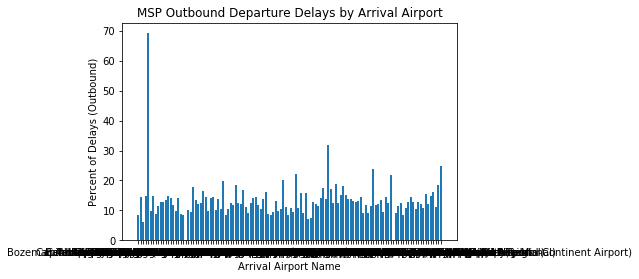

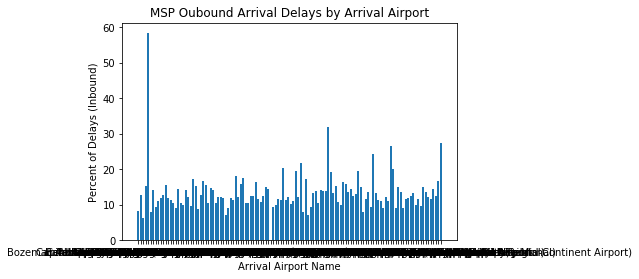

In [20]:
plt.bar(route_outbound_delays_df.index, route_outbound_delays_df["Percent of Delayed Departures"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Outbound Departure Delays by Arrival Airport")
plt.show()
plt.bar(route_outbound_delays_df.index, route_outbound_delays_df["Percent of Delayed Arrivals"])
plt.ylabel("Percent of Delays (Inbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Oubound Arrival Delays by Arrival Airport")
plt.show()

In [27]:
msp_inbound_df = route_df.loc[route_df["DEST_AIRPORT"] == "Minneapolis-Saint Paul International Airport", :]
f = {"DEP_DEL15":["count","sum"],"ARR_DEL15":["count","sum"]}
msp_inbound_delays_df=msp_inbound_df.groupby("ORIGIN_AIRPORT").agg(f)
msp_inbound_delays_df.columns=["dep_count","dep_sum","arr_count","arr_sum"]
msp_inbound_delays_df["Percent of Delayed Departures"] = (msp_inbound_delays_df["dep_sum"]/msp_inbound_delays_df["dep_count"])*100
msp_inbound_delays_df["Percent of Delayed Arrivals"] = (msp_inbound_delays_df["arr_sum"]/msp_inbound_delays_df["arr_count"])*100
msp_inbound_delays_df.head()

,dep_count,dep_sum,arr_count,arr_sum,Percent of Delayed Departures,Percent of Delayed Arrivals
ORIGIN_AIRPORT,,,,,,
Aspen-Pitkin County Airport,12,9.0,12,8.0,75.000000,66.666667
Chippewa County International Airport,57,3.0,57,32.0,5.263158,56.140351


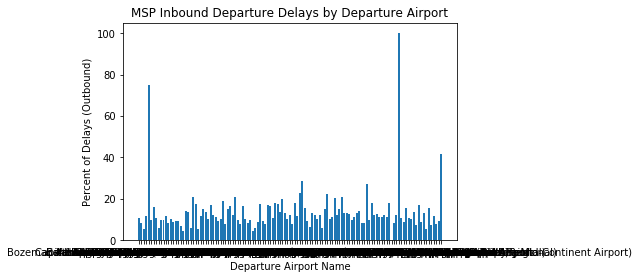

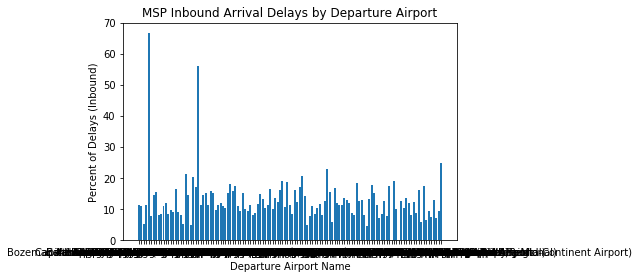

In [23]:
plt.bar(msp_inbound_delays_df.index, msp_inbound_delays_df["Percent of Delayed Departures"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Departure Delays by Departure Airport")
plt.show()
plt.bar(msp_inbound_delays_df.index, msp_inbound_delays_df["Percent of Delayed Arrivals"])
plt.ylabel("Percent of Delays (Inbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Arrival Delays by Departure Airport")
plt.show()

In [57]:
new_route_df = df[["OP_UNIQUE_CARRIER","ORIGIN_AIRPORT","DEST_AIRPORT","DEP_DELAY","DEP_DEL15","ARR_DELAY","ARR_DEL15", "CRS_ARR_TIME", "ARR_TIME"]]
new_route_df.head()
sched_vs_act_arrival_df = new_route_df.loc[new_route_df["ORIGIN_AIRPORT"] == "Minneapolis-Saint Paul International Airport", :]
sched_vs_act_arrival_df = sched_vs_act_arrival_df.loc[sched_vs_act_arrival_df["DEP_DEL15"] == 1, :]
sched_vs_act_arrival_df.head()

,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CRS_ARR_TIME,ARR_TIME
34,DL,Minneapolis-Saint Paul International Airport,Salt Lake City International Airport,129.0,1.0,104.0,1.0,1625,1809.0
37,DL,Minneapolis-Saint Paul International Airport,Detroit Metropolitan Airport,25.0,1.0,-3.0,0.0,2301,2258.0
62,DL,Minneapolis-Saint Paul International Airport,Orlando International Airport,18.0,1.0,15.0,1.0,30,45.0
71,DL,Minneapolis-Saint Paul International Airport,San Francisco International Airport,100.0,1.0,71.0,1.0,1407,1518.0
74,DL,Minneapolis-Saint Paul International Airport,San Diego International Airport (Lindbergh Field),31.0,1.0,0.0,0.0,1615,1615.0


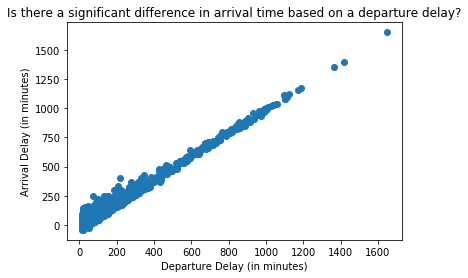

In [59]:
plt.scatter(sched_vs_act_arrival_df["DEP_DELAY"], sched_vs_act_arrival_df["ARR_DELAY"])
plt.ylabel("Arrival Delay (in minutes)")
plt.xlabel("Departure Delay (in minutes)")
plt.title("Is there a significant difference in arrival time based on a departure delay?")
plt.show()